In [202]:
import rvtx
import numpy as np
from IPython.display import Image

In [203]:
try:
    if RVTX_WINDOW_CREATED:
        print("rvtx window already created.")
except:
    window = rvtx.Window(width=1280, height=720, title="Ravioli Viewer", shown=False)
    RVTX_WINDOW_CREATED = True

engine = rvtx.Engine(window)

def screenshot(width = 640, height = 360, scene = rvtx.main_scene):
    display(Image(data=engine.screenshot(scene), width=width, height=height))

rvtx window already created.


In [204]:
molecule = rvtx.load_molecule("./data/1AGA.mmtf")

In [205]:
camera = rvtx.create_camera(rvtx.Transform([0, 0, -20]), rvtx.Camera.Target(molecule.aabb))
rvtx.set_main_camera(camera)
engine.update()

True

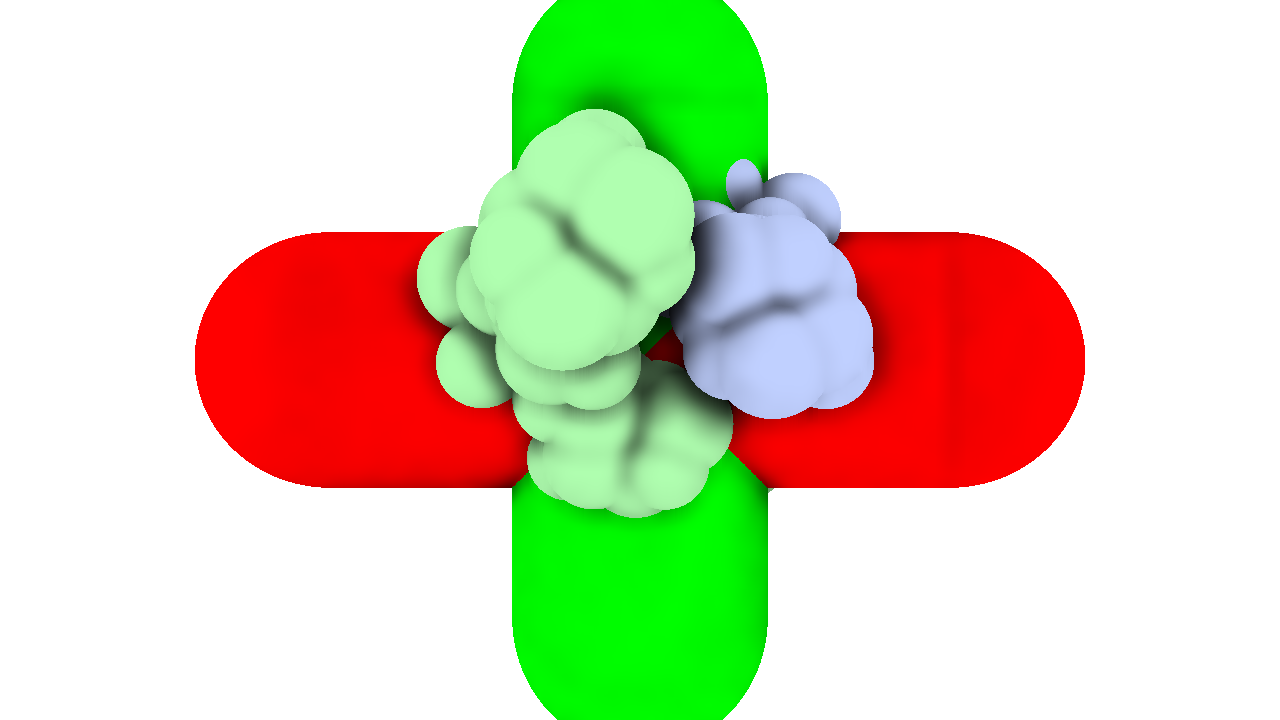

In [206]:
graph = rvtx.create_graph([molecule.aabb.centroid + [12, 0, 0], molecule.aabb.centroid - [12, 0, 0]], 5, [1, 0, 0])
screenshot()

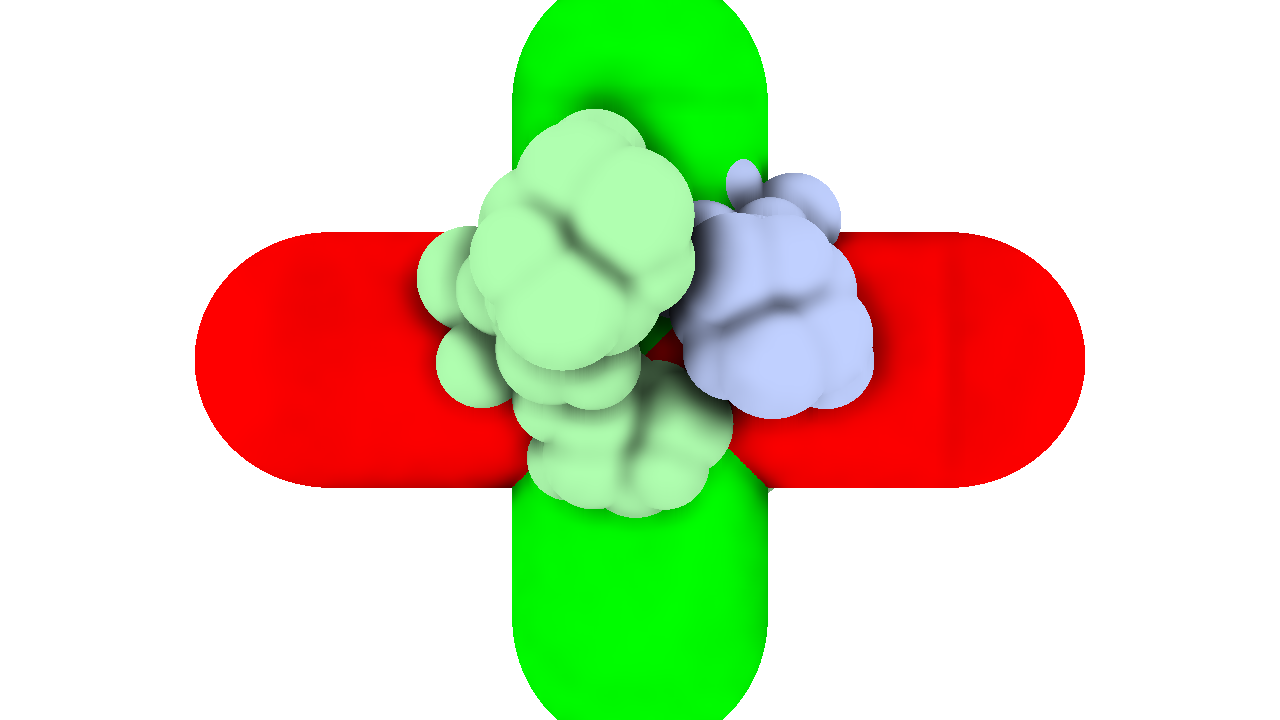

In [207]:
graph = rvtx.create_graph([molecule.aabb.centroid + [0, 10, 0], molecule.aabb.centroid - [0, 10, 0]], 5, [0, 1, 0])
screenshot() # Should only show the green graph

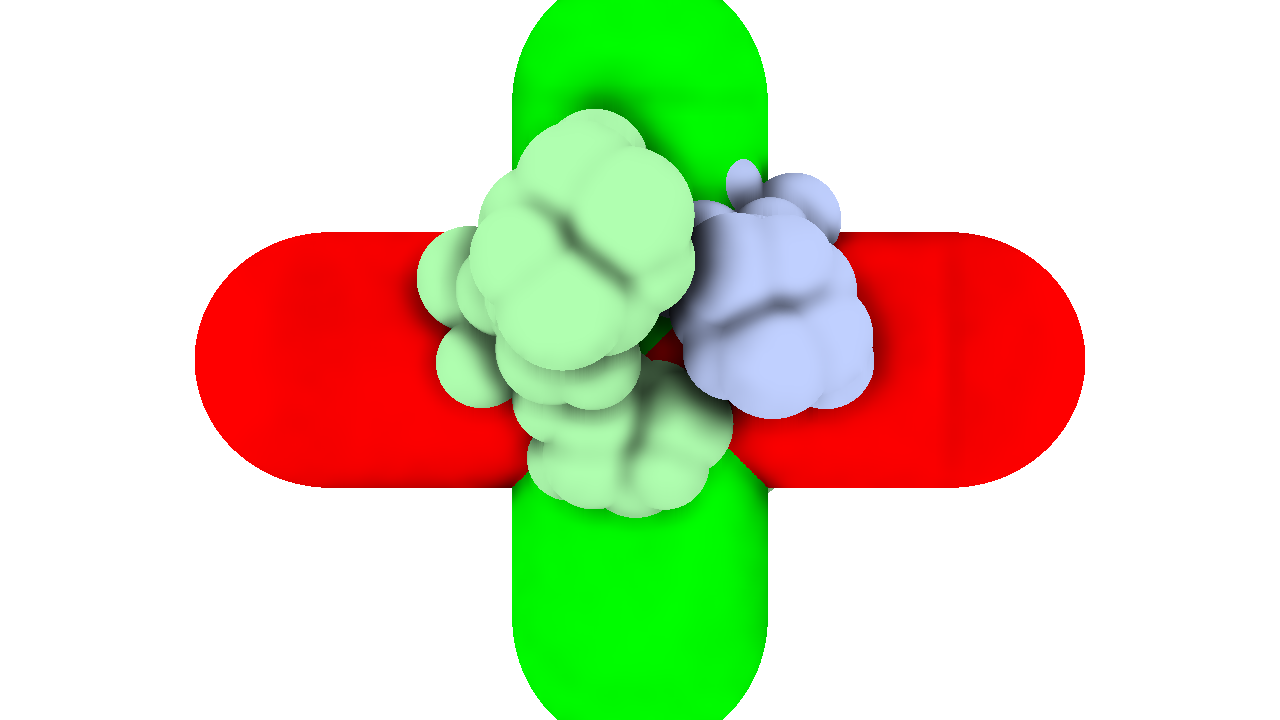

In [208]:
del graph
screenshot() # Should only show the molecule

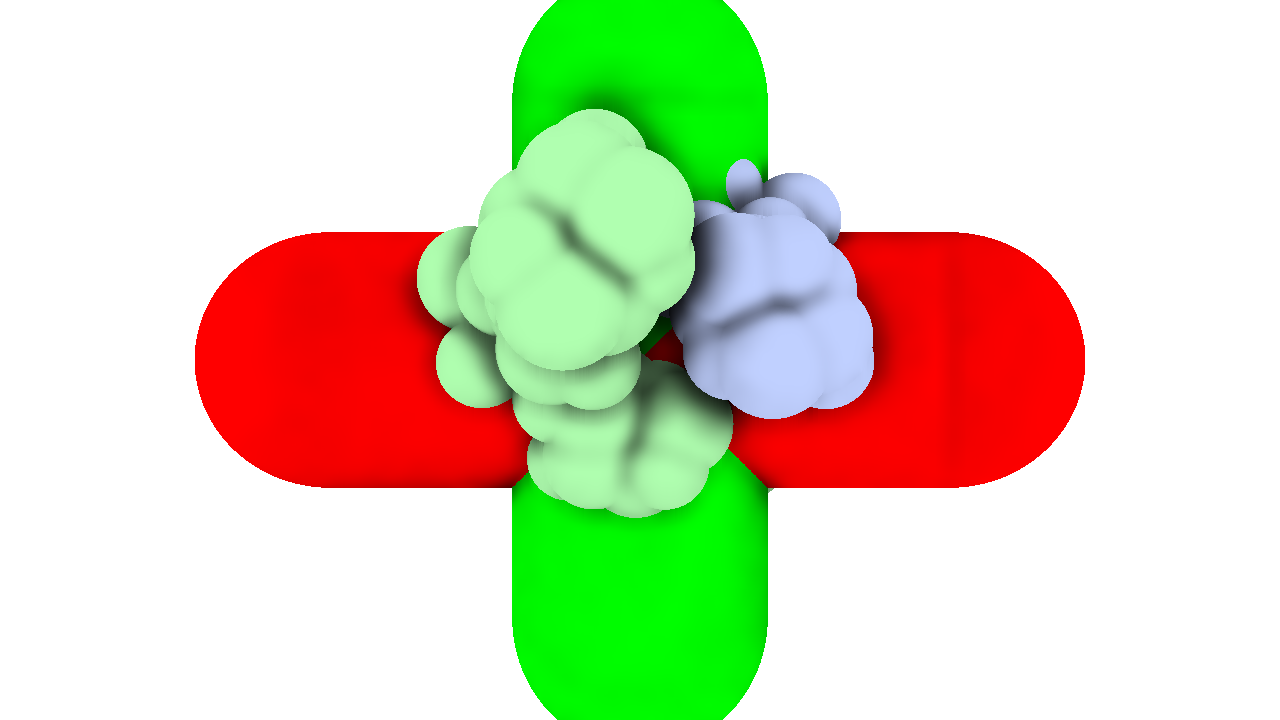

In [209]:
graph = rvtx.main_scene.create_graph([molecule.aabb.centroid + [12, 0, 0], molecule.aabb.centroid - [12, 0, 0]], 5, [1, 0, 0])
screenshot() # Should show the molecule and the red graph

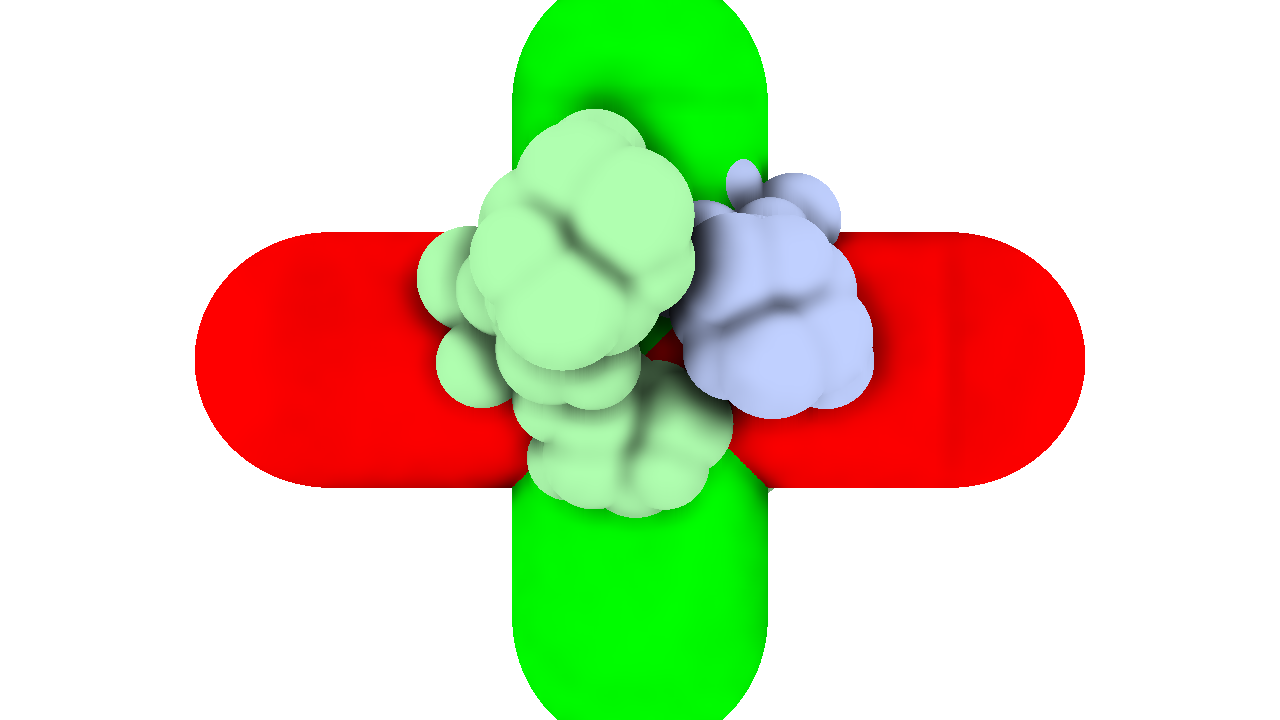

In [210]:
graph = rvtx.main_scene.create_graph([molecule.aabb.centroid + [0, 10, 0], molecule.aabb.centroid - [0, 10, 0]], 5, [0, 1, 0])
screenshot() # Should show the molecule and the red and green graphs

In [211]:
scene = rvtx.Scene()
camera = rvtx.create_camera(rvtx.Transform([0, 0, -20]), rvtx.Camera.Target(molecule.aabb))
scene.set_main_camera(camera)
engine.update(scene)

True

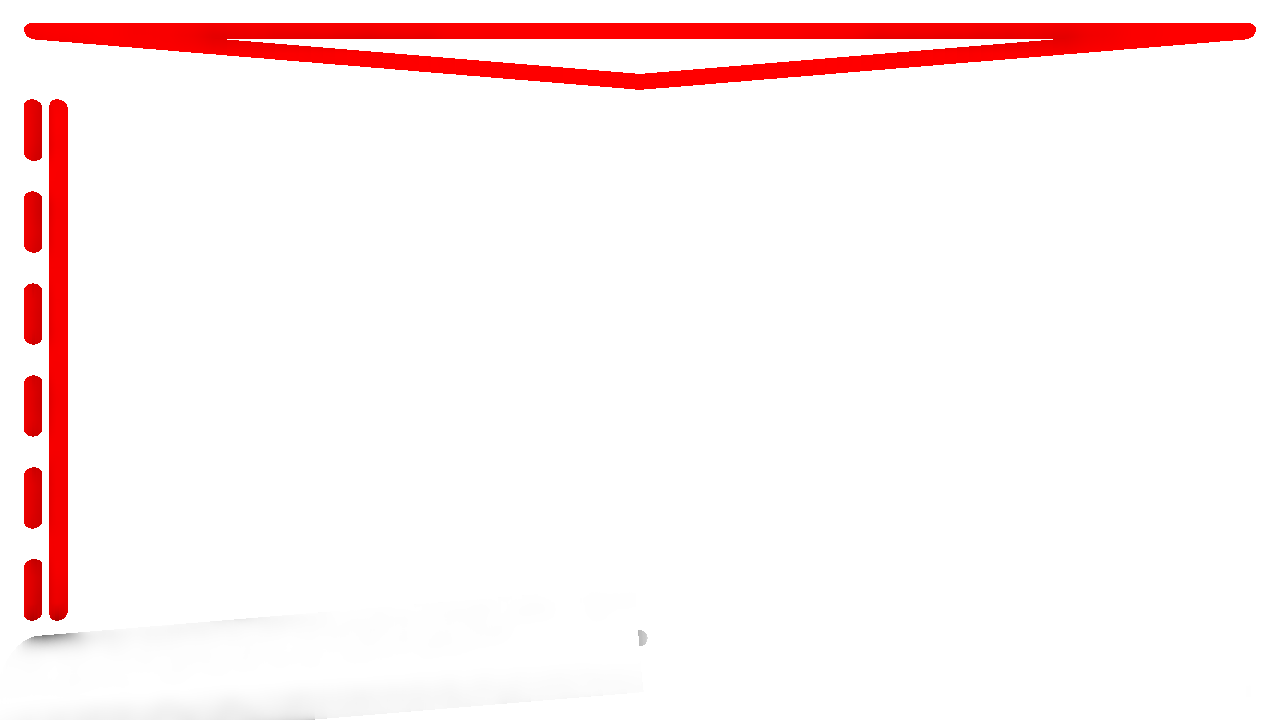

In [212]:
def gen_points(x, count):
    points = []
    for i in range(count+1):
        t = i / count
        points.append(molecule.aabb.centroid + [x, -10 * t + (1 - t) * 10, 0])
    return points

scene.create_graph(gen_points(-24, 11), 0.3, [1, 0, 0], rvtx.Graph.Lines)
scene.create_graph(gen_points(-23, 11), 0.3, [1, 0, 0], rvtx.Graph.LineStrip)
scene.create_graph([molecule.aabb.centroid + [-24, 13, 0], molecule.aabb.centroid + [0, 11, 0], molecule.aabb.centroid + [24, 13, 0]], 0.3, [1, 0, 0], rvtx.Graph.LineLoop)

scene.create_graph(gen_points(-21, 11), [0, 1, 0], 0.3, rvtx.Graph.Lines)
scene.create_graph(gen_points(-20, 11), [0, 1, 0], 0.3, rvtx.Graph.LineStrip)
scene.create_graph([molecule.aabb.centroid + [-24, -13, 0], molecule.aabb.centroid + [0, -11, 0], molecule.aabb.centroid + [24, -13, 0]], [1, 0, 0], 0.3, rvtx.Graph.LineLoop)

screenshot(scene=scene)